## Data Exploration with Spark

---

### Import Libraries

In [17]:
# import libraries
import findspark

# Locate the spark installation
findspark.init()

In [18]:
import pandas as pd
import pyspark as ps
from pyspark.sql.functions import col, sum
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql import SparkSession


### Initialize Spark

In [19]:
# Initialize a SparkContext
spark = SparkSession.builder.appName("data_cleaning").getOrCreate()
spark.stop()
sc = ps.SparkContext(appName="prior_analysis")

### Connect and import data from HDFS directly into a Spark DataFrame

In [20]:
# Initialize the Session
spark_session = ps.sql.SparkSession(sc)

# Define schema for better manipulation

data_schema = StructType([
    StructField("Title", StringType(), True),
    StructField("description", StringType(), True),
    StructField("authors", StringType(), True),
    StructField("image", StringType(), True),
    StructField("previewLink", StringType(), True),
    StructField("publisher", StringType(), True),
    StructField("publishedDate", StringType(), True),
    StructField("infoLink", StringType(), True),
    StructField("categories", StringType(), True),
    StructField("ratingsCount", FloatType(), True)
])

ratings_schema = StructType([
    StructField("Id", IntegerType(), True),
    StructField("Title", StringType(), True),
    StructField("Price", FloatType(), True),
    StructField("User_id", IntegerType(), True),
    StructField("profileName", StringType(), True),
    StructField("review/helpfulness", StringType(), True),
    StructField("review/score", FloatType(), True),
    StructField("review/time", IntegerType(), True),
    StructField("review/summary", StringType(), True),
    StructField("review/text", StringType(), True)
])


# Load the data

df_data = spark_session.read.option('escape','"').csv('hdfs://localhost:9900/user/book_reviews/books_data.csv', header=True, schema=data_schema)
df_ratings = spark_session.read.option('escape','"').csv('hdfs://localhost:9900/user/book_reviews/books_rating.csv', header=True, schema=ratings_schema)

### Data Exploration

- Show the first 5 rows of the data
- Investigate the inferred schema of the data
- Discover data dimensionality
- Show some statistics
- Discover null values
- Discover the number of distinct values in each column

In [21]:
# Show the data
print('Data Table: \n')
df_data.limit(5).toPandas()

Data Table: 



,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,None,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,None,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,None,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",None,['Edward Long'],None,http://books.google.nl/books?id=399SPgAACAAJ&d...,None,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,None,NaN


In [22]:
print('Ratings Table: \n')
df_ratings.limit(5).toPandas()

Ratings Table: 



23/09/05 00:19:08 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 9, schema size: 10
CSV file: hdfs://localhost:9900/user/book_reviews/books_rating.csv


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,NaN,None,NaN,NaN,7/7,4.0,9.406368e+08,NaN,This is only for Julie Strain fans. It's a col...,None
1,NaN,None,NaN,NaN,10/10,5.0,1.095725e+09,NaN,I don't care much for Dr. Seuss but after read...,None
2,NaN,None,NaN,NaN,10/11,5.0,1.078790e+09,NaN,"""If people become the books they read and if \...","\"" then Dr. Seuss (Theodor Seuss Geisel) is th..."
3,NaN,None,NaN,NaN,7/7,4.0,1.090714e+09,NaN,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",None
4,NaN,None,NaN,NaN,3/3,4.0,1.107994e+09,NaN,"""Philip Nel - Dr. Seuss: American IconThis is ...",but based on Seuss' background (he started ou...


In [23]:
#Investigate the schema
print('Data Table Schema: \n')
df_data.printSchema()

print('Ratings Table Schema: \n')
df_ratings.printSchema()

Data Table Schema: 

root
 |-- Title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- image: string (nullable = true)
 |-- previewLink: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- publishedDate: string (nullable = true)
 |-- infoLink: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- ratingsCount: float (nullable = true)

Ratings Table Schema: 

root
 |-- Id: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- Price: float (nullable = true)
 |-- User_id: integer (nullable = true)
 |-- profileName: string (nullable = true)
 |-- review/helpfulness: string (nullable = true)
 |-- review/score: float (nullable = true)
 |-- review/time: integer (nullable = true)
 |-- review/summary: string (nullable = true)
 |-- review/text: string (nullable = true)



In [24]:
# Check dimensionality
print(f'Data Table Dimensionality: {df_data.count(), len(df_data.columns)}')
print(f'Ratings Table Dimensionality: {df_ratings.count(), len(df_ratings.columns)}')

# Statistical summary
print('Data Table Summary: \n')
df_data.describe().show()

print('Ratings Table Summary: \n')
df_ratings.describe().show()

Data Table Dimensionality: (212404, 10)


Ratings Table Dimensionality: (3000000, 10)
Data Table Summary: 



23/09/05 00:19:12 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 9, schema size: 10
CSV file: hdfs://localhost:9900/user/book_reviews/books_rating.csv


+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+
|summary|               Title|         description|             authors|               image|         previewLink|           publisher|     publishedDate|            infoLink|          categories|      ratingsCount|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+
|  count|              212403|              143962|              180991|              160329|              188568|              136518|            187099|              188568|              171205|             49752|
|   mean|   3823.672941176471|  1.4285714285714286|                null|                null|                null|             51495.0|1

+-------+------------------+--------------------+-----------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|summary|                Id|               Title|            Price|             User_id|        profileName|  review/helpfulness|        review/score|         review/time|      review/summary|         review/text|
+-------+------------------+--------------------+-----------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  count|              4023|              482638|              367|                 445|            2999074|             2999696|             2994995|               13848|             2999721|              518238|
|   mean|2014.2972905791698|  21.768177001533367|15.84792918795136|1.8463986244269663E8|4.690351793452941E8|  1657.0094941017894|1.1270489306820

In [25]:
import numpy as np

# Check for number of distinct values for each column in %
n_distinct_list = []

for c in df_data.columns:
    n_distinct = df_data.select(c).distinct().count()
    n_distinct_list.append(n_distinct)

df_data_pandas = pd.DataFrame(index = df_data.columns, columns = ['N. Distinct Values'], data = (np.array((n_distinct_list))/df_data.count())*100)

n_distinct_list = []

for c in df_ratings.columns:
    n_distinct = df_ratings.select(c).distinct().count()
    n_distinct_list.append(n_distinct)

df_ratings_pandas = pd.DataFrame(index = df_ratings.columns, columns = ['N. Distinct Values'], data = (np.array((n_distinct_list))/df_ratings.count())*100)

23/09/05 00:19:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Title
 Schema: Id
Expected: Id but found: Title
CSV file: hdfs://localhost:9900/user/book_reviews/books_rating.csv
23/09/05 00:19:52 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Price
 Schema: Title
Expected: Title but found: Price
CSV file: hdfs://localhost:9900/user/book_reviews/books_rating.csv
23/09/05 00:19:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: User_id
 Schema: Price
Expected: Price but found: User_id
CSV file: hdfs://localhost:9900/user/book_reviews/books_rating.csv
23/09/05 00:20:00 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: profileName
 Schema: User_id
Expected: User_id but found: profileName
CSV file: hdfs://localhost:9900/user/book_reviews/books_rating.csv
23/09/05 00:20:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: review/helpfulness
 Schema: profileNa

In [26]:
from pyspark.sql.functions import col, count, when

# Check for missing values
df_data_pandas_tmp = df_data.select([sum(col(c).isNull().cast('int')).alias(c) for c in df_data.columns]).toPandas()
# Add to the pandas summary dataframe
df_data_pandas['N. Missing Values'] = (df_data_pandas_tmp.loc[0, :]/df_data.count()*100).tolist()

# Check for missing values
df_ratings_pandas_tmp = df_ratings.select([sum(col(c).isNull().cast('int')).alias(c) for c in df_ratings.columns]).toPandas()
# Add to the pandas summary dataframe
df_ratings_pandas['N. Missing Values'] = (df_ratings_pandas_tmp.loc[0, :]/df_ratings.count()*100).tolist()

23/09/05 00:20:50 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 9, schema size: 10
CSV file: hdfs://localhost:9900/user/book_reviews/books_rating.csv


In [27]:
df_data_pandas

,N. Distinct Values,N. Missing Values
Title,100.000000,0.000471
description,62.723395,32.222557
authors,59.923071,14.789270
image,70.332009,24.516958
previewLink,88.557654,11.222011
publisher,7.540818,35.727199
publishedDate,5.453287,11.913617
infoLink,86.866067,11.222011
categories,5.124197,19.396527
ratingsCount,0.225514,76.576712


In [28]:
df_ratings_pandas

,N. Distinct Values,N. Missing Values
Id,0.000567,99.865900
Title,0.212967,83.912067
Price,0.001167,99.987767
User_id,0.006733,99.985167
profileName,0.541467,0.030867
review/helpfulness,0.071067,0.010133
review/score,0.209267,0.166833
review/time,0.134167,99.538400
review/summary,68.648700,0.009300
review/text,11.199633,82.725400


<Axes: title={'center': 'Ratings Table Summary'}, ylabel='Percentage'>

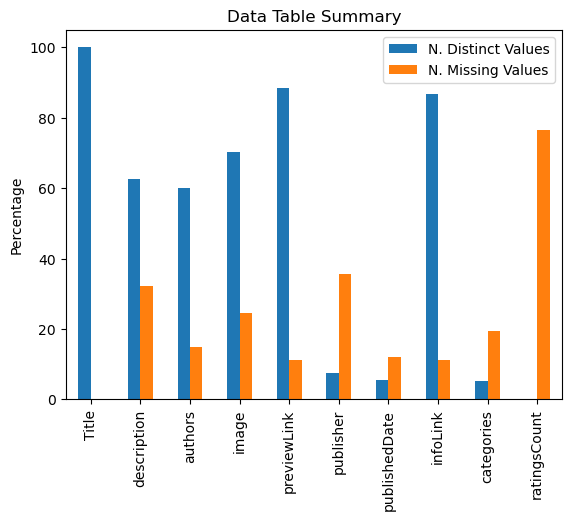

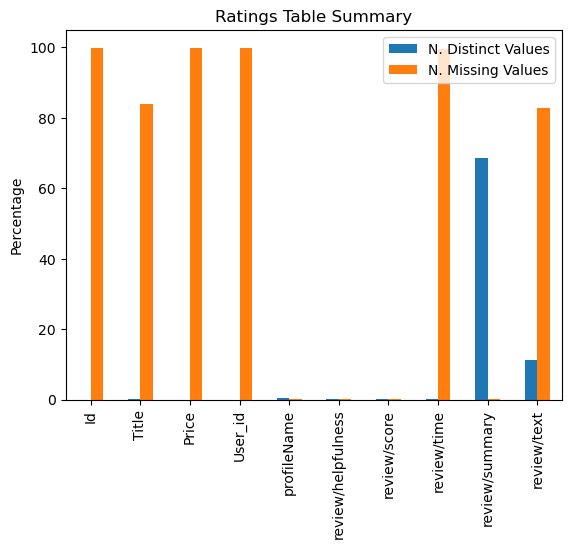

In [29]:
#df_data_pandas.set_index('Column', inplace=True)
df_data_pandas.plot(title='Data Table Summary', kind='bar', ylabel='Percentage')

#df_ratings_pandas.set_index('Column', inplace=True)
df_ratings_pandas.plot(title='Ratings Table Summary', kind='bar', ylabel='Percentage')

In [32]:
spark_session.stop()